<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG</h1></div>
<div><h2>Bài tập 01</h2></div>

**THÔNG TIN CÁ NHÂN**

- _Họ tên sinh viên:_ **Nguyễn Đặng Đăng Khoa**

- _Mã số sinh viên:_ **21120179**

**KHAI BÁO THƯ VIỆN**

In [1]:
import numpy as np
import numpy.matlib as npm
import pandas as pd
import math
import random as rd
import collections as clt
import statistics as sts

import matplotlib.pyplot as plt
import seaborn as sns

# **CÂU 1**
Chơi trò Tôm Cua (https://vi.wikipedia.org/wiki/L%E1%BA%AFc_b%E1%BA%A7u_cua). Người chơi có $6$ tờ $1\$$ và muốn đặt tất cả $6$ tờ này một lần. Phân tích các cách đặt (như đặt cả $6$ tờ vào mặt Tôm, hay $5$ tờ mặt Tôm và $1$ tờ mặt Cua...) để chọn ra cách đặt tốt nhất cho người chơi. Có nên chơi trò này không?

**_Lý thuyết_**

Giả sử, trò chơi Tôm Cua gồm có 6 ô hình sau: Bầu, Cua, Tôm, Cá, Gà, Nai.

Với người chơi có $6$ tờ tiền mệnh giá $1\$$ và muốn đặt tất cả $6$ tờ tiền vào một lần chơi, ta có **$11$** cách đặt như sau:
- TH1: Đặt $6$ tờ tiền vào cùng $1$ ô hình.
- TH2: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $5-1$.
- TH3: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $4-2$.
- TH4: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $4-1-1$.
- TH5: Đặt $6$ tờ tiền vào $2$ ô hình khác nhau từng đôi với tỷ lệ $3-3$.
- TH6: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $3-2-1$.
- TH7: Đặt $6$ tờ tiền vào $4$ ô hình khác nhau từng đôi với tỷ lệ $3-1-1-1$.
- TH8: Đặt $6$ tờ tiền vào $3$ ô hình khác nhau từng đôi với tỷ lệ $2-2-2$.
- TH9: Đặt $6$ tờ tiền vào $4$ ô hình khác nhau từng đôi với tỷ lệ $2-2-1-1$.
- TH10: Đặt $6$ tờ tiền vào $5$ ô hình khác nhau từng đôi với tỷ lệ $2-1-1-1-1$.
- TH11: Đặt $6$ tờ tiền vào $6$ ô hình khác nhau từng đôi với tỷ lệ $1-1-1-1-1-1$.


**_Mô phỏng_**

- Mô phỏng xúc xắc và các trường hợp.

In [2]:
# Các ô hình trò chơi
dice = ['Bầu', 'Cua', 'Tôm', 'Cá', 'Gà', 'Nai']

# Các trường hợp đặt cược
case_lst = [[6],
            [5, 1],
            [4, 2], [4, 1, 1],
            [3, 3], [3, 2, 1], [3, 1, 1, 1],
            [2, 2, 2], [2, 2, 1, 1], [2, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1]]

# Số lần mô phỏng
N = 1_000_000

- Mô phỏng đổ xúc xắc và đặt cược.

In [3]:
def shake_dices(lst:list=dice, num_dices:np.uint8=3) -> list:
    return np.random.choice(lst, num_dices)

def place_bets(case_:list, lst:list=dice) -> list:
    if len(case_) <= len(lst):
        return rd.sample(lst, len(case_))
    return []

- Mô phỏng kiểm tra kết quả đặt cược

In [4]:
# Kiểm tra kết quả đặt cược
def check_result(bet_case:list, lst:list=dice) -> int:
    dices = shake_dices(lst=lst)
    count_dict = clt.Counter(dices)
    way = place_bets(bet_case)
    count_list = np.array([count_dict.get(ele_way, 0) for ele_way in way])
    appearance = (count_list > 0)*1
    return np.dot(bet_case, np.add(count_list, appearance)) - sum(bet_case)

- Thực hiện mô phỏng $1,000,000$ lần chơi.

In [5]:
def simulate(bet_case:list, num_simulation:np.uint64=N, lst:list=dice) -> list:
    record_lst = np.array([check_result(bet_case, lst=lst) for _ in range(num_simulation)])
    win_raito = float("{:.3f}".format((record_lst > 0).mean()))
    prize = sts.mode(record_lst[(record_lst > 0)]) if win_raito > 0.0 else 0
    lose_raito = float("{:.3f}".format((record_lst < 0).mean()))
    penalty = sts.mode(record_lst[(record_lst < 0)]) if lose_raito > 0.0 else 0
    draw_raito = float("{:.3f}".format(1.0 - win_raito - lose_raito))
    return [win_raito, draw_raito, lose_raito, prize, penalty * (-1)]

In [6]:
record_df = pd.DataFrame([simulate(case_) for case_ in case_lst],
                          columns=['Thắng', 'Hòa', 'Thua', 'Số tiền lời', 'Số tiền lỗ'],
                          index=['-'.join(map(str, case_)) for case_ in case_lst])

record_df

KeyboardInterrupt: 

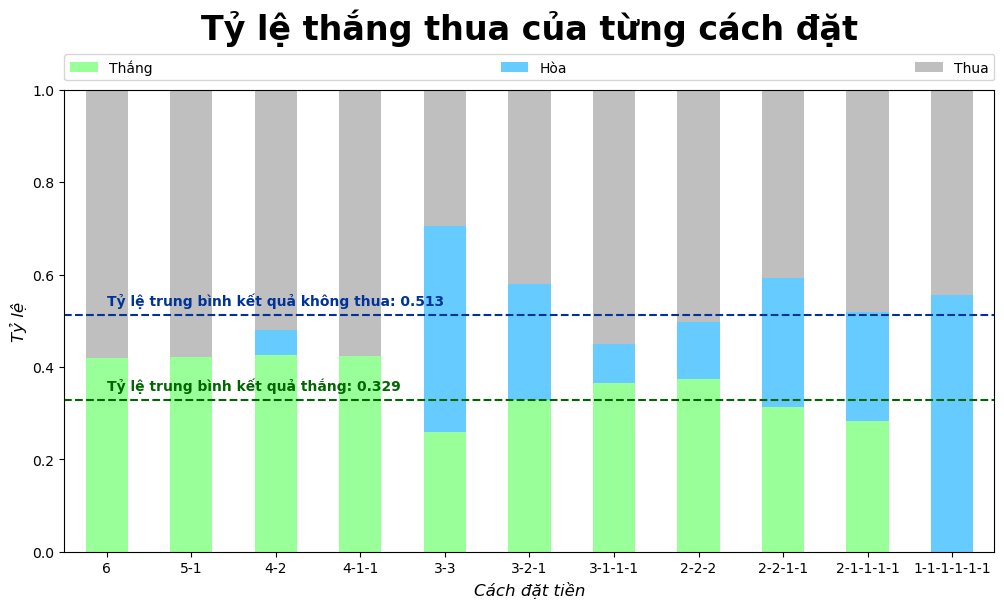

In [ ]:
record_df[['Thắng', 'Hòa', 'Thua']].plot(kind='bar', stacked=True, color=['#99FF99', '#66CCFF', '#BFBFBF'], figsize=(12, 6), ylim=[0, 1]);
plt.title('Tỷ lệ thắng thua của từng cách đặt', {'weight': 'bold', 'size': 24}, 'center', 36);
plt.xticks(rotation=0);
plt.xlabel('Cách đặt tiền', {'style': 'italic', 'size': 12})
plt.ylabel('Tỷ lệ', {'style': 'italic', 'size': 12})
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3);

not_lose_raito = 1 - record_df['Thua'].mean()
win_raito = record_df['Thắng'].mean()
plt.axhline(y=win_raito, linestyle='--', color='#006600');
plt.annotate("Tỷ lệ trung bình kết quả thắng: {:.3f}".format(win_raito), xy=(0, win_raito), xytext=(0, win_raito+0.02), color='#006600', weight='bold');
plt.axhline(y=not_lose_raito, linestyle='--', color='#003399');
plt.annotate("Tỷ lệ trung bình kết quả không thua: {:.3f}".format(not_lose_raito), xy=(0, not_lose_raito), xytext=(0, not_lose_raito+0.02), color='#003399', weight='bold');

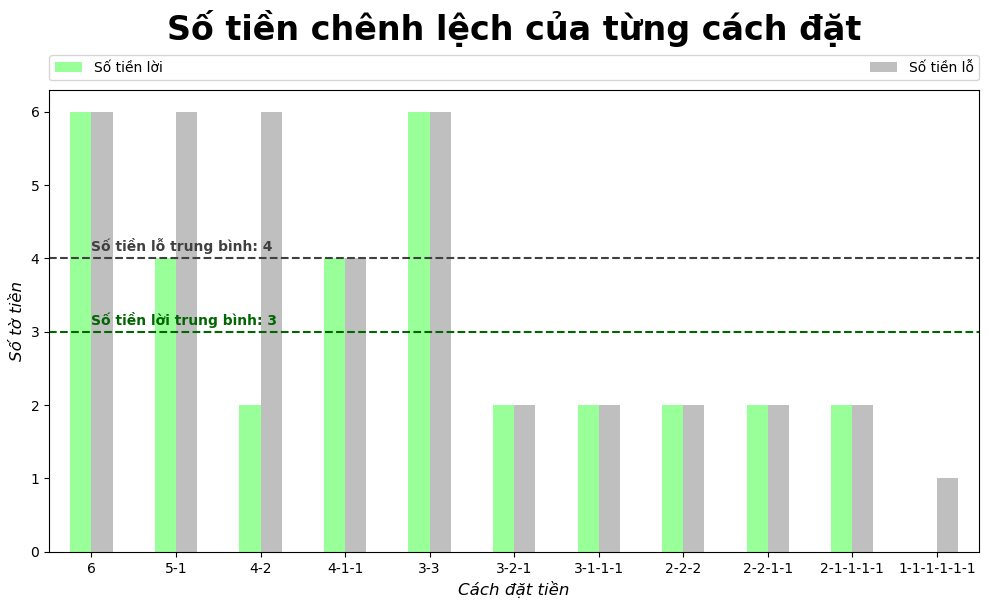

In [ ]:
record_df[['Số tiền lời', 'Số tiền lỗ']].plot(kind='bar', color=['#99FF99', '#BFBFBF'], figsize=(12, 6));
plt.title('Số tiền chênh lệch của từng cách đặt', {'weight': 'bold', 'size': 24}, 'center', 36);
plt.xticks(rotation=0);
plt.xlabel('Cách đặt tiền', {'style': 'italic', 'size': 12})
plt.ylabel('Số tờ tiền', {'style': 'italic', 'size': 12})
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3);

prize = round(record_df['Số tiền lời'].mean())
penalty = round(record_df['Số tiền lỗ'].mean())
plt.axhline(y=prize, linestyle='--', color='#006600');
plt.annotate("Số tiền lời trung bình: %d" % prize, xy=(0, prize), xytext=(0, prize+0.1), color='#006600', weight='bold');
plt.axhline(y=penalty, linestyle='--', color='#404040');
plt.annotate("Số tiền lỗ trung bình: %d" % penalty, xy=(0, penalty), xytext=(0, penalty+0.1), color='#404040', weight='bold');

**_Nhận xét_**
- Nhìn chung, tỷ lệ người chơi sẽ thắng hoặc không thua dưới xấp xỉ $50\%$, đây là tỷ lệ mức khả quan. Cụ thể, tỷ lệ người chơi sẽ thắng là $32.9\%$, tỷ lệ người chơi không bị thua là $51.3\%$.
- Số tiền lời trung bình (khi người chơi thắng) thấp hơn số tiền lỗ trung bình (khi người chơi thua), cho thấy số tiền người chơi lời nhận được ở lượt này xấp xỉ bằng hoặc ít hơn số tiền mất mát ở lượt chơi khác.
- Xét về các cách đặt tiền vào các ô hình:
    + TH1: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về cao nhất. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH2: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về lớn. Số tiền lỗ cao hơn số tiền lời.
    + TH3: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về rất ít. Số tiền lỗ cao hơn số tiền lời và có sự chênh lệch rõ rệt.
    + TH4: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về lớn. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH5: Tỷ lệ thắng thấp hơn mức trung bình, nhưng số tiền lời nhận về cao nhất. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH6: Tỷ lệ thắng xấp xỉ mức trung bình, số tiền lời nhận về không nhiều. Số tiền lỗ cao hơn số tiền lời.
    + TH7: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về không nhiều. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH8: Tỷ lệ thắng cao hơn mức trung bình, số tiền lời nhận về rất ít. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH9: Tỷ lệ thắng thấp hơn mức trung bình, số tiền lời nhận về rất ít. Số tiền lỗ cao hơn số tiền lời.
    + TH10: Tỷ lệ thắng thấp hơn mức trung bình, số tiền lời nhận về rất ít. Sự chênh lệch giữa số tiền lời và lỗ dường như không có.
    + TH11: Tỷ lệ thắng không có, tỷ lệ thua tương đối cao, xấp xỉ $50\%$. Số tiền lỗ rất ít.
    
$\Rightarrow$ Để giảm thiểu mất mát, người chơi có thể đặt những cách có tỷ lệ thắng cao, số tiền lời cao và sự chênh lệch với số tiền lỗ nhỏ, như là cách đặt $6$, $5-1$, $4-1-1$, $3-3$, $3-1-1-1$, $2-2-2$.   


# **CÂU 2**
Chơi game bắn quái vật. Giả sử các lần bắn độc lập nhau với xác suất trúng mỗi lần là $\frac{1}{4}$. Quái vật bị mất $20\%$ máu sau mỗi lần bị bắn trúng và chết khi mất $100\%$ máu.

In [ ]:
# Quái vật
monster = 1.0

# Xác suất bắn trúng
p_hit = 0.25

# Mức máu hao hụt khi trúng đạn
reducetion = 0.2

# Số lần mô phỏng
N = 1_000_000

**_Lý thuyết_**

Gọi $X$ là số lần người chơi bắn trượt cho tới khi quái vật chết.</br>
Gọi $r$ là số lần bắn trúng cần thiết để quái vật chết.</br>
Gọi $p$ là xác suất người chơi bắn trúng quái vật ở mỗi lần bắn.</br>
Gọi $Y$ là số lần người chơi cần bắn cho tới khi quái vật chết.

Khi đó:
- $p = \frac{1}{4}$.
- $r = 5$.
- $Y = X + r$.
- $X$ có phân phối nhị thức âm với $r$ và $p$ hay $X \sim \text{nb}(x, r, p)$.

## **_Tính xác suất quái vật chết sau không quá $20$ lần bắn._**

**_Lý thuyết_**

Xác suất để quái vật chết sau không quá $20$ lần bắn:</br>
$\displaystyle P(Y\leq 20) = P(X\leq 15) = \sum_{x=0}^{15}\text{nb}\left(x,5,\frac{1}{4}\right) = \sum_{x=0}^{15}C_{x+4}^4 \left(\frac{1}{4}\right)^5 \left(\frac{3}{4}\right)^x$

In [ ]:
float("{:.3f}".format((0.25**5) * np.sum([math.comb(x+4, 4)*(0.75**x) for x in range(16)])))

0.585

**_Mô phỏng_**

In [ ]:
# Kiểm tra quái vật có chết trong 20 lần bắn hay không
def is_killed(num_shots:np.uint64, monster:float=monster, weight:float=p_hit, amount_reduce:float=reducetion):
    num_hits = (np.random.choice(['Trúng', 'Trượt'], num_shots, p=[weight, 1-weight]) == 'Trúng').sum()
    monster -= num_hits * amount_reduce
    return float("{:.1f}".format(monster)) <= 0

# Tính xác suất bắn quái vật chết không quá 20 lần bắn
def compute_frequency(num_shots:np.uint64, num_simulation:np.uint64=N):
    return float("{:.3f}".format(np.array([is_killed(num_shots) for _ in range(num_simulation)]).mean()))

print('Xác suất quái vật chết sau không quá 20 lần bắn:', compute_frequency(20, N))

Xác suất quái vật chết sau không quá 20 lần bắn: 0.586


## **_Cần bắn ít nhất bao nhiêu lần để quái vật chết với xác suất không dưới $95\%$?_**

**_Lý thuyết_**

Theo đề, ta có:</br>
$\begin{matrix}
& \displaystyle P\left(Y\leq x+5\right) & \geq & 0.95 & \text{(với } x+5 \text{ là số lần bắn đến khi quái vật chết)}\\
\Leftrightarrow & P\left(X\leq x\right) & \geq & 0.95 \\
\Leftrightarrow & \displaystyle \sum_{k=0}^{x} C_{k+4}^4 \left(\frac{1}{4}\right)^5 \left(\frac{3}{4}\right)^k & \displaystyle \geq & 0.95 \\
\end{matrix}$

In [ ]:
def compute_prob_greater_than(prob:float):
    x_ = 0
    sum = math.comb(x_+4, 4)*(0.25**5)*(0.75**x_)
    while sum < prob:
        x_ += 1
        sum += math.comb(x_+4, 4)*(0.25**5)*(0.75**x_)
    return x_ + 5

print('Vậy cần phải bắn ít nhất',
      compute_prob_greater_than(0.95),
      'lần để xác suất quái vật chết không dưới 95%.')

Vậy cần phải bắn ít nhất 34 lần để xác suất quái vật chết không dưới 95%.


**_Mô phỏng_**

In [ ]:
record_s = pd.Series([compute_frequency(index, N) for index in range(51)])

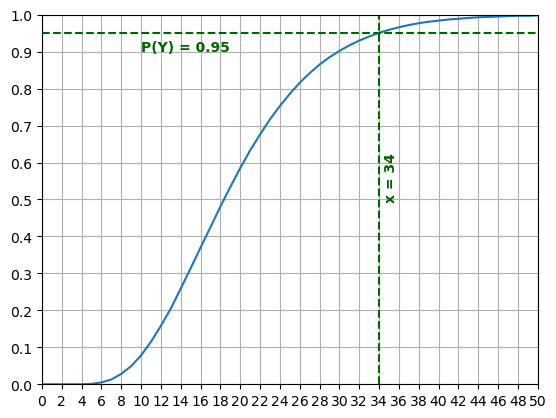

In [ ]:
record_s.plot(ylim=[0, 1], xlim=[0,50], xticks=range(0, 51, 2), yticks=np.arange(0, 1.05, 0.1));
plt.grid(True);
plt.axhline(y=0.95, linestyle='--', color='#006600');
plt.annotate("P(Y) = {:.2f}".format(0.95), xy=(0, 0.95), xytext=(10, 0.9),
             color='#006600', weight='bold');

x_val = record_s[record_s >= 0.95].index[0]
plt.axvline(x=x_val, linestyle='--', color='#006600');
plt.annotate("x = %d" % x_val, xy=(x_val, 0), xytext=(x_val+0.5, 0.5),
             color='#006600', weight='bold', rotation=90);

## **_Cần bắn khoảng bao nhiêu lần để quái vật chết?_**

**_Lý thuyết_**

Ta có kỳ vọng:

$\displaystyle E\left(X\right) = \frac{r \left(1-p\right)}{p} = \frac{5*\displaystyle\frac{3}{4}}{\displaystyle\frac{1}{4}}=15\\
\Rightarrow E\left(Y\right) = E\left(X+5\right) = E\left(X\right) + 5 = 20$

Vậy, kỳ vọng khoảng $20$ lần bắn để quái vật chết.


**_Mô phỏng_**

In [ ]:
# Đếm số lần bắn cho đến khi quái vật chết
def count_number_shots(monster:float=monster, weight:float=p_hit, amount_reduce:float=reducetion):
    count = 0
    while monster > 0.0:
        if np.random.choice(['Trúng', 'Trượt'], 1, p=[weight, 1-weight])[0] == 'Trúng':
            monster -= amount_reduce
        count += 1
    return count

Mode:  20


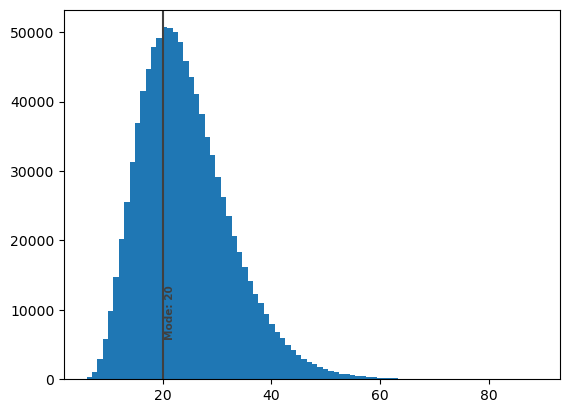

In [ ]:
record_s = pd.Series([count_number_shots() for _ in range (N)])
plt.hist(record_s, record_s.unique().max()-record_s.unique().min()+1);

mode_val = round(sts.mode(record_s))
plt.axvline(x=mode_val, color='#404040');
plt.annotate("Mode: %d" % mode_val, xy=(mode_val, 0), xytext=(mode_val+0.5, 6000),
             color='#404040', weight='bold', rotation=90, size=7.5);

print('Mode: ', mode_val)

Vậy, cần khoảng $20$ lần bắn để quái vật chết.

## **_Làm lại câu trên với giả sử nếu sau $5$ lần liên tiếp không bắn trúng thì quái vật sẽ phục hồi $100\%$ máu._**

In [ ]:
# Đếm số lần bắn cho đến khi quái vật chết
def count_number_shots(monster:float=monster, weight:float=p_hit, amount_reduce:float=reducetion):
    count = 0
    marker = 0
    while (monster > 0.0):
        count += 1
        marker += 1
        if rd.choices(['Trúng', 'Trượt'], [weight, 1-weight])[0] == 'Trúng':
            monster -= amount_reduce
            marker = 0
        if marker == 5:
            monster = 1.0
    return count

Mode:  15


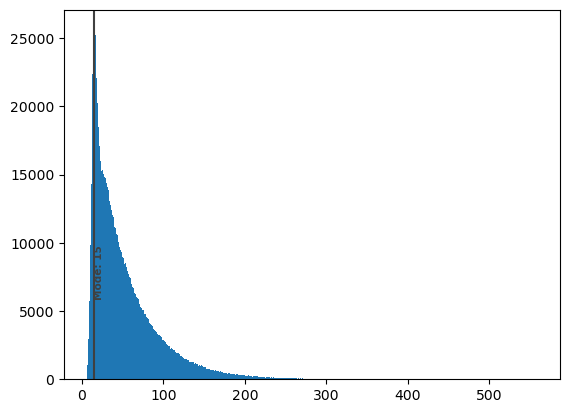

In [ ]:
record_s = pd.Series([count_number_shots() for _ in range (N)])
plt.hist(record_s, record_s.unique().max()-record_s.unique().min()+1);

mode_val = round(sts.mode(record_s))
plt.axvline(x=mode_val, color='#404040');
plt.annotate("Mode: %d" % mode_val, xy=(mode_val, 0), xytext=(mode_val+0.5, 6000),
             color='#404040', weight='bold', rotation=90, size=7.5);

print('Mode: ', mode_val)

# **CÂU 3**
Bài toán cháy túi. Một người chơi bạc ở Casino. Giả sử mỗi lần chơi chỉ cược $1\$$ và thắng với xác suất là $p$. Người chơi có vốn ban đầu là $k\$$ và chơi cho đến khi được $q\$$ hoặc cháy túi mới dừng. Tính xác suất cháy túi trong các trường hợp:

In [ ]:
# Số tiền đặt cược
bet_amount = 1

# Số lần mô phỏng
N = 30_000

# Mô phỏng trò chơi
def is_burnt_out(capital:int, target:np.uint64, prob:float, amount:np.uint64=bet_amount) -> bool:
    while 0 < capital and capital < target:
        if np.random.choice(['Thắng', 'Thua'], 1, p=[prob, 1-prob])[0] == 'Thắng':
            capital += amount
        else:
            capital -= amount
    return True if capital == 0 else False

def simulate(capital:int, target:np.uint64, prob:float, amount:np.uint64=bet_amount, num_simulation:np.uint64=N):
    return np.mean(np.array([is_burnt_out(capital, target, prob, amount)*1 for _ in range(num_simulation)]))

**_Lý thuyết:_** **XÍCH MARKOV**

Theo đề bài, ta có các trạng thái sau mỗi lần chơi của người chơi:
- Trạng thái $s_0$: Người chơi đang có $0\$$ (tức người chơi cháy túi),
- Trạng thái $s_1$: Người chơi đang có $1\$$,</br>
$\qquad\vdots$
- Trạng thái $s_k$: Người chơi đang có $k\$$,</br>
$\qquad\vdots$
- Trạng thái $s_{q-1}$: Người chơi đang có $\left(q-1\right)\$$,
- Trạng thái $s_q$: Người chơi đang có $q\$$ (tức người chơi dừng chơi vì đã đạt được $q\$$).

Tại từng lần chơi rời rạc $t=0,1,2,...$, người chơi chỉ nhận đúng một trong các trạng thái $s_1,s_2,...,s_k,...,s_{q-1},s_q$.

Gọi $X_n$ là biến ngẫu nhiên biểu diễn trạng thái $s_k$ bất kỳ tại lần chơi thứ $n=0,1,2,...$.

Gọi $\pi_n(k)=P(X_n)=s_k$, có nghĩa là $\pi_n(k)$ là phân phối Xích Markov tại lần chơi $t=n$ của trạng thái $s_k$. Khi đó $\pi_n^\top=\left(\pi_n(0),\pi_n(1),...,\pi_n(q)\right)$ là vector của các xích tại thời điểm lần chơi $t=n$.

Gọi $P=(p_{ij})\in\mathbb{R}^{q\times q}$, với $i,j=0,1,2,...,q$. Với mọi $n$, ta có:</br>
$\displaystyle \pi_n=\pi_0P^n$

## $p=\frac{1}{2}$, $k=55$, $q=100$.

In [ ]:
p = 0.5
k = 55
q = 100

**_Lý thuyết_**

Ta có: $k=55$, $q=100$, $\displaystyle p\left(\text{thắng}\right)=\frac{1}{2} \Rightarrow p\left(\text{thua}\right)=\frac{1}{2}$.</br>
Suy ra: $\pi_0^\top=(\underset{54\text{ lần}}{\underbrace{0,0,...,0}},1,\underset{45\text{ lần}}{\underbrace{0,0,...,0}})$

In [ ]:
pi_ = np.zeros(q)
pi_[k-1] = 1
pi_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Ma trận chuyển $P$:

In [ ]:
mtr_P = npm.zeros((q, q))
for i in range(q):
    if (i == 0) | (i == q-1):
        mtr_P[i,i] = 1
    else:
        mtr_P[i, i-1] = 1-p
        mtr_P[i, i+1] = p
mtr_P

matrix([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
        [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
        [0. , 0. , 0. , ..., 0.5, 0. , 0.5],
        [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

Khi $n$ đủ lớn, ta thấy $P(X_n=s_0)$ xấp xỉ

In [ ]:
for _ in range(100):
    mtr_P = np.dot(mtr_P, mtr_P)
np.diag(np.dot(pi_,mtr_P))[0]

0.45454545454545325

**_Mô phỏng_**

In [ ]:
simulate(k, q, p)

0.452

## $p=\frac{2}{5}$, $k=75$, $q=100$.

In [ ]:
p = 0.4
k = 75
q = 100

**_Lý thuyết_**

Ta có: $k=75$, $q=100$, $\displaystyle p\left(\text{thắng}\right)=\frac{2}{5} \Rightarrow p\left(\text{thua}\right)=\frac{3}{5}$.</br>
Suy ra: $\pi_0^\top=(\underset{74\text{ lần}}{\underbrace{0,0,...,0}},1,\underset{25\text{ lần}}{\underbrace{0,0,...,0}})$

In [ ]:
pi_ = np.zeros(q)
pi_[k-1] = 1
pi_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Ma trận chuyển $P$:

In [ ]:
mtr_P = npm.zeros((q, q))
for i in range(q):
    if (i == 0) | (i == q-1):
        mtr_P[i,i] = 1
    else:
        mtr_P[i, i-1] = 1-p
        mtr_P[i, i+1] = p
mtr_P

matrix([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0.6, 0. , 0.4, ..., 0. , 0. , 0. ],
        [0. , 0.6, 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0.4, 0. ],
        [0. , 0. , 0. , ..., 0.6, 0. , 0.4],
        [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

Khi $n$ đủ lớn, ta thấy $P(X_n=s_0)$ xấp xỉ

In [ ]:
for _ in range(100):
    mtr_P = np.dot(mtr_P, mtr_P)
np.diag(np.dot(pi_,mtr_P))[0]

0.9999603978719531

**_Mô phỏng_**

In [ ]:
simulate(k, q, p)

0.9999666666666667

## $p=\frac{2}{5}$, $k=95$, $q=100$.

In [ ]:
p = 0.4
k = 95
q = 100

**_Lý thuyết_**

Ta có: $k=95$, $q=100$, $\displaystyle p\left(\text{thắng}\right)=\frac{2}{5} \Rightarrow p\left(\text{thua}\right)=\frac{3}{5}$.</br>
Suy ra: $\pi_0^\top=(\underset{94\text{ lần}}{\underbrace{0,0,...,0}},1,\underset{5\text{ lần}}{\underbrace{0,0,...,0}})$

In [ ]:
pi_ = np.zeros(q)
pi_[k-1] = 1
pi_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

Ma trận chuyển $P$:

In [ ]:
mtr_P = npm.zeros((q, q))
for i in range(q):
    if (i == 0) | (i == q-1):
        mtr_P[i,i] = 1
    else:
        mtr_P[i, i-1] = 1-p
        mtr_P[i, i+1] = p
mtr_P

matrix([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0.6, 0. , 0.4, ..., 0. , 0. , 0. ],
        [0. , 0.6, 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0.4, 0. ],
        [0. , 0. , 0. , ..., 0.6, 0. , 0.4],
        [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

Khi $n$ đủ lớn, ta thấy $P(X_n=s_0)$ xấp xỉ

In [ ]:
for _ in range(100):
    mtr_P = np.dot(mtr_P, mtr_P)
np.diag(np.dot(pi_,mtr_P))[0]

0.8683127572016407

**_Mô phỏng_**

In [ ]:
simulate(k, q, p)

0.8666